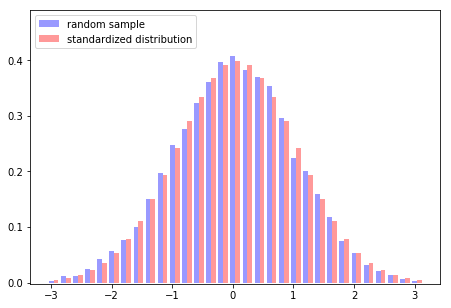

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

sampleno = 10000 #采样次数，随着采样次数的增加，频率趋于稳定
gap = 0.2
range_p = 3

X = np.arange(-range_p,range_p+gap,gap)
n = len(X)
mu = 0
sigma = 1

pad = gap/5
width_b = (gap - pad)/2

sample = np.random.normal(mu, sigma, sampleno) #Y1为随机采样
Y1 = np.array([0 for i in range(n)])
for i in sample:
    if i >= -range_p and i <= range_p:
        Y1[int(i/gap + range_p/gap + 0.5)] += 1
Y1 = Y1/(sampleno*gap)
Y2 = stats.norm.pdf(X,mu,sigma) #Y2为标准正态分布
plt.axes([0.025,0.025,.95,0.95])

plt.bar(X, Y1, width = width_b, facecolor='#9999ff', edgecolor=None,label='random sample')
plt.bar(X+width_b,  Y2, width = width_b, facecolor='#ff9999',label='standardized distribution')
plt.legend(loc="upper left")

plt.ylim(-0.5*np.min(Y2),1.2*np.max([Y2,Y1]))

# savefig('../figures/bar_ex.png', dpi=48)
plt.show()

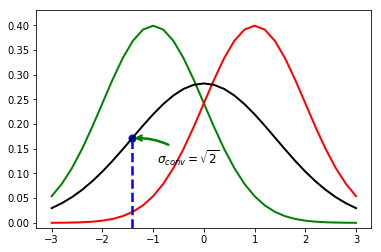

In [6]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from pylab import *
from scipy.integrate import quad,dblquad,nquad
gap = 0.2
range_p = 3

X = np.arange(-range_p,range_p+gap,gap)
n = len(X)
param = {'mu':[-1,1],
        'sigma':[1,1]}

Y1 = stats.norm.pdf(X,param['mu'][0],param['sigma'][0])
plot(X,Y1, color="green", linewidth=2.0, label = "statdardized")
Y2 = stats.norm.pdf(X,param['mu'][1],param['sigma'][1])
plot(X,Y2, color="red", linewidth=2.0, label = "statdardized")

def convfunc(x,z):
    return stats.norm.pdf(x,param['mu'][0],param['sigma'][0])*stats.norm.pdf(z-x,param['mu'][1],param['sigma'][1])

Z = []
for z in X:
    Z.append(quad(lambda x:convfunc(x,z),-np.inf,np.inf)[0])

plot(X,Z, color="black", linewidth=2.0, label = "statdardized")
plt.ylim(-.01,0.43)
t = -2**0.5
yt = quad(lambda x:convfunc(x,t),-np.inf,np.inf)[0]
annotate(r'$\sigma_{conv}=\sqrt{2}$',
         xy=(t, yt), xycoords='data',
         xytext=(25, -25), textcoords='offset points', fontsize=12,
         arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2",color='green',linewidth=2.5))

plot([t,t],[-.01,yt], color ='blue', linewidth=2.5, linestyle="--")
scatter([t,],[quad(lambda x:convfunc(x,t),-np.inf,np.inf)[0],], 50, color ='blue')
show()